### Analysis of an E-commerce Dataset

We have been provided with a combined e-commerce dataset. In this dataset, each user has the ability to post a rating and review for the products they purchased. Additionally, other users can evaluate the initial rating and review by expressing their trust or distrust.

This dataset includes a wealth of information for each user. Details such as their profile, ID, gender, city of birth, product ratings (on a scale of 1-5), reviews, and the prices of the products they purchased are all included. Moreover, for each product rating, we have information about the product name, ID, price, and category, the rating score, the timestamp of the rating and review, and the average helpfulness of the rating given by others (on a scale of 1-5).

The dataset is from several data sources, and we have merged all the data into a single CSV file named 'A Combined E-commerce Dataset.csv'. The structure of this dataset is represented in the header shown below.

| userId | gender | rating | review| item | category | helpfulness | timestamp | item_id | item_price | user_city|

    | ---- | ---- | ---- | ---- | ---- | ---- | ---- | ---- | ---- |  ---- |  ---- |  
    
#### Description of Fields

* __userId__ - the user's id
* __gender__ - the user's gender
* __rating__ - the user's rating towards the item
* __review__ - the user's review towards the item
* __item__ - the item's name
* __category__ - the category of the item
* __helpfulness__ - the average helpfulness of this rating
* __timestamp__ - the timestamp when the rating is created
* __item_id__ - the item's id
* __item_price__ - the item's price
* __user_city__ - the city of user's birth

Note that, a user may rate multiple items and an item may receive ratings and reviews from multiple users. The "helpfulness" is an average value based on all the helpfulness values given by others.

There are four questions to explore with the data as shown below.



<img src="data-relation.png" align="left" width="400"/>


 #### Q1. Remove missing data
 
Please remove the following records in the csv file: 
 
 * gender/rating/helpfulness is missing
 * review is 'none'

__Display the DataFrame, counting number of Null values in each column, and print the length of the data__ before and after removing the missing data.  

In [3]:
# Importing our data & tools
import pandas as pd
import numpy as np
%matplotlib inline 
ecomdata = pd.read_csv("The E-commerce Dataset.csv")


In [4]:
#Cleaning Missing Data based on the question's condition put into a boolean vector
clean_ecomdata = ecomdata.drop(ecomdata.index[(ecomdata.gender.isna()) | (ecomdata.rating.isna()) | 
(ecomdata.helpfulness.isna()) | (ecomdata.review == 'none')])
print(len(clean_ecomdata))


19916


In [5]:
#Display Clean Dataframe
clean_ecomdata.head()

,userId,timestamp,review,item,rating,helpfulness,gender,category,item_id,item_price,user_city
0,4051,12807,Great job for what it is!,eBay,5.0,2.0,F,Online Stores & Services,88,149.00,39
1,4052,122899,Free Access Worth your Time,NetZero,5.0,0.0,F,Online Stores & Services,46,53.00,39
2,33,12700,AOL..I love you!!!!!!!!!!!!,AOL (America Online),5.0,4.0,F,Online Stores & Services,0,145.84,31
3,33,21000,EBAY!!! I LOVE YOU!!!! :-)*,eBay,5.0,4.0,F,Online Stores & Services,88,149.00,31
4,33,22300,Blair Witch...Oh Come On.......,Blair Witch Project,1.0,4.0,F,Movies,12,44.00,31


In [6]:
# isnull() gets a Series of True for null and False values.
# sum() will sum on the result to count the True = 1 values, which represent the nulls.
print("before clean")
print(ecomdata.isnull().sum())
print()
print("after clean")
print(clean_ecomdata.isnull().sum())

before clean
userId          0
timestamp       0
review          0
item            0
rating         17
helpfulness    22
gender         27
category        0
item_id         0
item_price      0
user_city       0
dtype: int64

after clean
userId         0
timestamp      0
review         0
item           0
rating         0
helpfulness    0
gender         0
category       0
item_id        0
item_price     0
user_city      0
dtype: int64


In [7]:
#length of the data before and after removing the missing data
print("before")
print(len(ecomdata))
print()
print("after")
print(len(clean_ecomdata))

before
20000

after
19916


#### Q2. Descriptive statistics

With the cleaned data in Q1, please provide the data summarization as below:

* Q2.1 total number of unique users, unique reviews, unique items, and unique categories
* Q2.2 descriptive statistics, e.g., the total number, mean, std, min and max regarding all rating records
* Q2.3 descriptive statistics, e.g., mean, std, max, and min of the number of items rated by different genders 
* Q2.4 descriptive statistics, e.g., mean, std, max, min of the number of ratings that received by each items 


In [8]:
#Q2.1 total number of unique users, unique reviews, unique items, and unique categories
#unique() method returns array of unique values and with len() we can count

print(len(clean_ecomdata['userId'].unique()))
print(len(clean_ecomdata['review'].unique()))
print(len(clean_ecomdata['item'].unique()))
print(len(clean_ecomdata['category'].unique()))



8562
19459
89
9


In [9]:
# Q2.2 descriptive statistics, e.g., the total number, mean, std, min and max regarding all rating records
#.describe() shows us all the necessary info we only need to choose rating column
clean_ecomdata['rating'].describe()

count    19916.000000
mean         3.701798
std          1.404451
min          1.000000
25%          3.000000
50%          4.000000
75%          5.000000
max          5.000000
Name: rating, dtype: float64

In [10]:
#Q2.3 descriptive statistics, e.g., mean, std, max, and min of the number of items rated by different genders
# This groups the Data Frame by the gender column meaning all records with the same gender are grouped together.
#After grouping by gender, we counts the number of item entries for each gender and do the descriptive statistic analysis
['item'].count(): After grouping by gender, this counts the number of item entries (or records) for each gender group. Essentially, it gives you the number of items reviewed by each gender.
print(clean_ecomdata.groupby('gender')['item'].count().describe())




count        2.000000
mean      9958.000000
std        233.345238
min       9793.000000
25%       9875.500000
50%       9958.000000
75%      10040.500000
max      10123.000000
Name: item, dtype: float64


In [11]:
#Q2.4 descriptive statistics, e.g., mean, std, max, min of the number of ratings that received by each items
# This groups the DataFrame by the item column. This means that all records corresponding to the same item are grouped together.
print(clean_ecomdata.groupby('item')['rating'].describe())


                       count      mean       std  min   25%  50%  75%  max
item                                                                      
AOL (America Online)   939.0  2.500532  1.368528  1.0  1.00  2.0  4.0  5.0
All Advantage          657.0  3.412481  1.541706  1.0  2.00  4.0  5.0  5.0
Alta Vista (by 1stUp)  157.0  3.541401  1.263341  1.0  3.00  4.0  4.0  5.0
Amazon.com             240.0  3.683333  1.571095  1.0  2.00  4.0  5.0  5.0
American Airlines      185.0  3.054054  1.417015  1.0  2.00  3.0  4.0  5.0
...                      ...       ...       ...  ...   ...  ...  ...  ...
Wendy's                210.0  3.971429  1.093322  1.0  3.25  4.0  5.0  5.0
What Lies Beneath      160.0  3.450000  1.201676  1.0  3.00  3.5  4.0  5.0
X-Men                  245.0  4.118367  0.853074  1.0  4.00  4.0  5.0  5.0
X.com                  173.0  4.023121  1.474409  1.0  3.00  5.0  5.0  5.0
eBay                   596.0  4.333893  0.949618  1.0  4.00  5.0  5.0  5.0

[89 rows x 8 columns]


#### Q3. Plotting and Analysis

Please try to explore the correlation between gender/helpfulness/category and ratings; for instance, do female/male users tend to provide higher ratings than male/female users? Hint: you may use the boxplot function to plot figures for comparison (___Challenge___)
    
You may need to select the most suitable graphic forms for ease of presentation. Most importantly, for each figure or subfigure, please summarise ___what each plot shows___ (i.e. observations and explanations). Finally, you may need to provide an overall summary of the data.

<Axes: xlabel='gender', ylabel='helpfulness'>

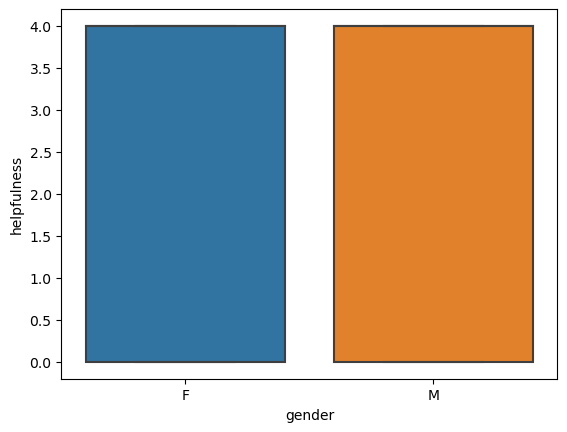

In [26]:
import seaborn as sns
sns.boxplot(x='gender', y='helpfulness', data=clean_ecomdata)



# Boxplot of Helpfulness by Gender:
- Both male and female users seem to have reviews with a median helpfulness around 4.
- The range of helpfulness scores is similar for both genders, with both having scores spread between the lower to upper quartiles.
- There **doesn't seem to be a significant difference** in the perceived helpfulness of reviews based on gender.

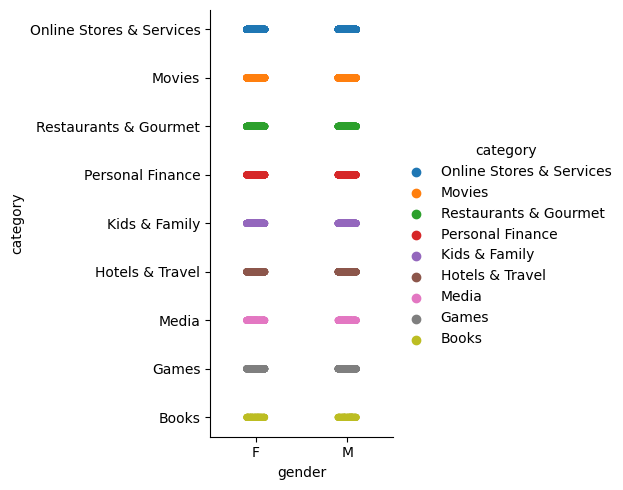

In [23]:
sns.catplot(x='gender', y='category', hue='category', data=clean_ecomdata)
plt.show()


# Categorical Plot of Gender vs Category:
- This plot showcases the distribution of product categories for each gender. The repeated color patterns indicate that both genders have reviewed products from a variety of categories.
- Both male and female users seem to review products across various categories. However, due to the overlap and dense clustering, it's challenging to discern any clear patterns or preferences for either gender regarding specific categories

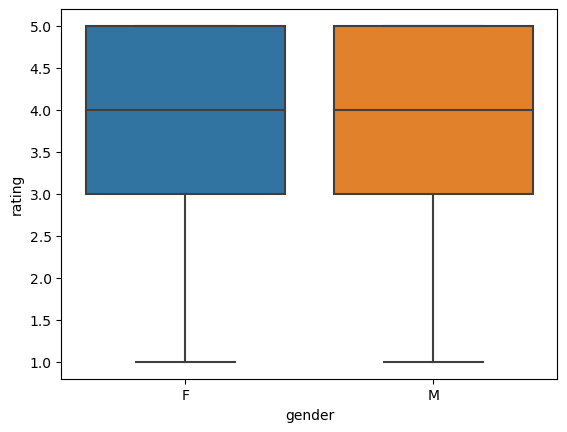

In [27]:
sns.boxplot(x='gender', y='rating' , data=clean_ecomdata)
plt.show()

# Boxplot of Ratings by Gender:
- Both male and female users have a median rating close to 4.
- The interquartile range for ratings is similar for both genders.
- As seen in the previous analysis, both genders tend to provide similar ratings, with neither being consistently more generous or critical than the other.

#### Q4. Detect and remove outliers

We may define outlier users, reviews and items with three rules (if a record meets one of the rules, it is regarded as an outlier):

* reviews of which the helpfulness is no more than 2
* users who rate less than 7 items
* items that receives less than 11 ratings 
 
Please remove the corresponding records in the csv file that involves outlier users, reviews and items. After that, __print the length of the data__.

In [28]:
# Drop records from data frame where the helpfulness score is less than or equal to 2
clean_ecomdata_noout = clean_ecomdata.drop(clean_ecomdata.index[clean_ecomdata.helpfulness <= 2])

print(len(clean_ecomdata_noout))



13643


In [29]:
# Group by userid and count their ratings
user_rating_counts = clean_ecomdata_noout.groupby('userId').size()

# we get userids with fewer than 7 ratings
users_to_drop = user_rating_counts[user_rating_counts < 7].index

# Find the indices in the original dataframe corresponding to these users
to_drop = clean_ecomdata_noout[clean_ecomdata_noout['userId'].isin(users_to_drop)].index

# Drop these indices from the dataframe
clean_ecomdata_noout = clean_ecomdata_noout.drop(to_drop)
print(len(clean_ecomdata_noout))


2741


In [30]:
# Group by 'item' and count the number of occurrences of each item in the dataset
item_counts = clean_ecomdata_noout.groupby('item').size()

# Identify items that have been reviewed less than 11 times
items_to_drop = item_counts[item_counts < 11].index

# Get the records in the dataset that correspond to the items identified to be dropped
items_drop_list = clean_ecomdata_noout[clean_ecomdata_noout['item'].isin(items_to_drop)].index

# Drop the records corresponding to the identified indices from the dataset
clean_ecomdata_noout = clean_ecomdata_noout.drop(index=items_drop_list)


In [31]:
#length of the data before and after removing outliers
print(len(clean_ecomdata))
print(len(clean_ecomdata_noout))

19916
2685
